In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

d:\SWs\Python39\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
d:\SWs\Python39\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("lithium-ion batteries.csv")
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.70,0.01,3.46,16,2.99,178.51,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.70,0.01,2.88,32,2.93,365.27,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.77,0.01,3.65,28,2.76,301.77,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.78,0.01,3.02,38,2.91,436.18,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.75,0.02,2.58,36,3.33,421.29,True,monoclinic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


In [4]:
df.isna().sum()* 100 / len(df)

Materials Id            0.00
Formula                 0.00
Spacegroup              0.00
Formation Energy (eV)   0.00
E Above Hull (eV)       0.00
Band Gap (eV)           0.00
Nsites                  0.00
Density (gm/cc)         0.00
Volume                  0.00
Has Bandstructure       0.00
Crystal System          0.00
dtype: float64

In [5]:
df["Crystal System"].value_counts()

monoclinic      139
orthorhombic    128
triclinic        72
Name: Crystal System, dtype: int64

In [6]:
#from pandas_profiling import profile_report
#profile_report.ProfileReport(df).to_file("battery_sys_report.html")

In [7]:
data = df.drop(["Materials Id"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Formula                339 non-null    object 
 1   Spacegroup             339 non-null    object 
 2   Formation Energy (eV)  339 non-null    float64
 3   E Above Hull (eV)      339 non-null    float64
 4   Band Gap (eV)          339 non-null    float64
 5   Nsites                 339 non-null    int64  
 6   Density (gm/cc)        339 non-null    float64
 7   Volume                 339 non-null    float64
 8   Has Bandstructure      339 non-null    bool   
 9   Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(3)
memory usage: 24.3+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_to_conv = ["Formula", "Spacegroup", "Has Bandstructure", "Crystal System"]
for i in cols_to_conv:
    data[i] = le.fit_transform(data[i])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Formula                339 non-null    int32  
 1   Spacegroup             339 non-null    int32  
 2   Formation Energy (eV)  339 non-null    float64
 3   E Above Hull (eV)      339 non-null    float64
 4   Band Gap (eV)          339 non-null    float64
 5   Nsites                 339 non-null    int64  
 6   Density (gm/cc)        339 non-null    float64
 7   Volume                 339 non-null    float64
 8   Has Bandstructure      339 non-null    int64  
 9   Crystal System         339 non-null    int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 22.6 KB


In [10]:
data["Crystal System"].value_counts()

0    139
1    128
2     72
Name: Crystal System, dtype: int64

<AxesSubplot:>

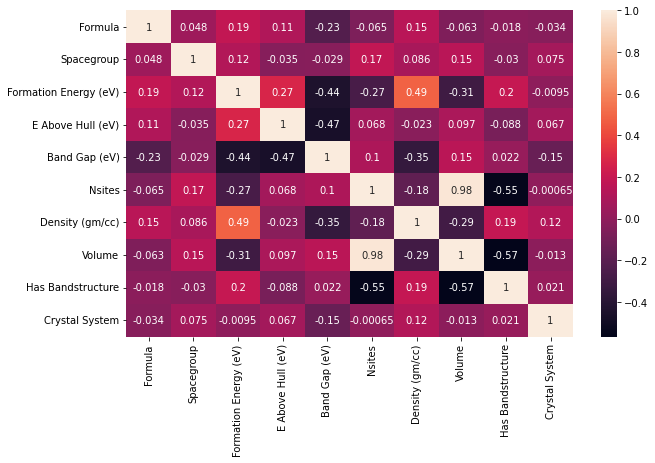

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot = True)

In [12]:
result_df = data.drop(["Nsites"], axis = 1)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Formula                339 non-null    int32  
 1   Spacegroup             339 non-null    int32  
 2   Formation Energy (eV)  339 non-null    float64
 3   E Above Hull (eV)      339 non-null    float64
 4   Band Gap (eV)          339 non-null    float64
 5   Density (gm/cc)        339 non-null    float64
 6   Volume                 339 non-null    float64
 7   Has Bandstructure      339 non-null    int64  
 8   Crystal System         339 non-null    int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 20.0 KB


In [13]:
from imblearn.over_sampling import SMOTE

X = data.drop(['Crystal System'],axis=1) # Features
y = data['Crystal System'] # Target
sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=7)
X_res, y_res = sm.fit_resample(X, y)

In [14]:
y_res.value_counts()

0    139
1    139
2    139
Name: Crystal System, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Formula                339 non-null    int32  
 1   Spacegroup             339 non-null    int32  
 2   Formation Energy (eV)  339 non-null    float64
 3   E Above Hull (eV)      339 non-null    float64
 4   Band Gap (eV)          339 non-null    float64
 5   Nsites                 339 non-null    int64  
 6   Density (gm/cc)        339 non-null    float64
 7   Volume                 339 non-null    float64
 8   Has Bandstructure      339 non-null    int64  
 9   Crystal System         339 non-null    int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 22.6 KB


In [16]:
# Train-Test splitting the data with test size as 25%
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.25, random_state=7)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
def cr(test, pred):
  print(classification_report(test,pred))

  fig, ax= plt.subplots(figsize = (6,4))
  cf_matrix = confusion_matrix(test,pred)
  #[0][0] = True Negative 
  #[1][0] = False Negative
  #[0][1] = False Positive
  #[1][1] = True Positive
  TN = cf_matrix[0][0]
  FP = cf_matrix[0][1]
  FN = cf_matrix[1][0] 
  TP = cf_matrix[1][1]
  # calculate the sensitivity
  conf_sensitivity = TP / (TP + FN)
  print("Sensitivity: ", conf_sensitivity)
  # calculate the specificity
  conf_specificity = TN / (TN + FP)
  print("Specificity: ", conf_specificity)
  ax.set_title("Confusion Matrix Heatmap", fontsize = 15)
  sns.heatmap(cf_matrix, annot=True, fmt = 'g', ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')

In [19]:
# fit all models
lazy_clf = LazyClassifier(predictions=True)
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 34.46it/s]


In [20]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.99,None,0.99,0.11
DecisionTreeClassifier,0.99,0.99,None,0.99,0.00
XGBClassifier,0.99,0.99,None,0.99,0.12
BaggingClassifier,0.97,0.97,None,0.97,0.03
RandomForestClassifier,0.96,0.96,None,0.96,0.11
ExtraTreesClassifier,0.95,0.95,None,0.95,0.07
LabelPropagation,0.83,0.83,None,0.82,0.01
LabelSpreading,0.83,0.83,None,0.82,0.01
GaussianNB,0.83,0.83,None,0.83,0.01


Accuracy Score: 0.9904761904761905
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00        36

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

Sensitivity:  0.9705882352941176
Specificity:  1.0


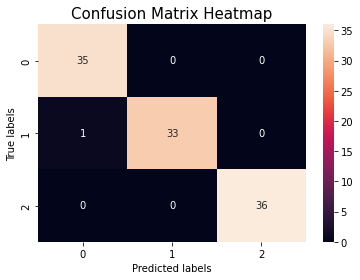

In [21]:
import lightgbm as lgb
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
y_pred = LGBM_clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
cr(y_test, y_pred)

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.9904721863519425

In [23]:
from sklearn.metrics import make_scorer

custom_f1 = make_scorer(
    f1_score, greater_is_better=True, average="weighted", labels=[0, 1, 2]
  )

custom_f1

make_scorer(f1_score, average=weighted, labels=[0, 1, 2])

In [24]:
clf_xgb = lgb.LGBMClassifier()

param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

tuned_clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 5,
                         scoring = custom_f1, 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  25 | elapsed:    2.4s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed:    2.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.8s finished


Accuracy Score: 0.9904761904761905
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00        36

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

Sensitivity:  0.9705882352941176
Specificity:  1.0


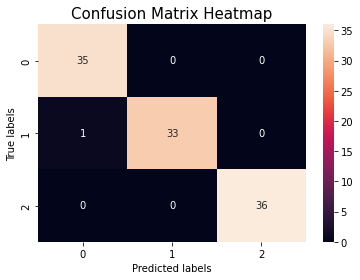

In [25]:
tuned_clf.fit(X_train, y_train)
y_pred_2 = tuned_clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_2))
cr(y_test, y_pred_2)

In [26]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", tuned_clf.best_estimator_)
print("\n The best score across ALL searched params:\n", tuned_clf.best_score_)
print("\n The best parameters across ALL searched params:\n", tuned_clf.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 LGBMClassifier(colsample_bytree=0.7107291648204334,
               learning_rate=0.08063920716119051, max_depth=6,
               min_child_weight=4, n_estimators=234,
               subsample=0.8344483894885835)

 The best score across ALL searched params:
 0.9613098910801735

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.7107291648204334, 'learning_rate': 0.08063920716119051, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 234, 'subsample': 0.8344483894885835}
